In [2]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.9 MB/s eta 0:00:00


In [3]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 56.3 MB/s eta 0:00:00


In [4]:
pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.5/378.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 4.3 MB/s eta 0:00:00


In [5]:
from qiskit import QuantumCircuit

#halfadder
qc = QuantumCircuit(4, 2)
qc.h([0,1])
qc.ccx(0,1,3)
qc.cx(0,2)
qc.cx(1,2)
qc.measure([2,3], [0,1])


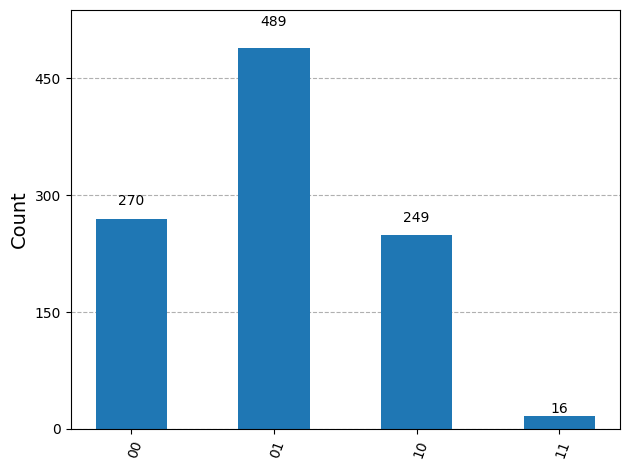

In [6]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import transpile
from qiskit_aer.noise import NoiseModel
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
from qiskit.visualization import plot_histogram

#run the circuit on a model of IBM Brisbane
device_backend = FakeBrisbane()
noise_model = NoiseModel.from_backend(device_backend)

noisy_sim = AerSimulator(noise_model=noise_model)

transpiled_qc = transpile(qc, noisy_sim)

result = noisy_sim.run(transpiled_qc).result()
counts = result.get_counts()

plot_histogram(counts)
#11 shouldn't be an output. a qubit accidentally flipped